In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [15]:
def rename_imgs(file_name):
    folder_path = 'C:/Users/minec/Desktop/IBM THINGS/MODEL TESTING/test_dataset/'+file_name

    num = 0
    for file in os.listdir(folder_path):
        # if num%10 == 0:
        #     print(f'Renamed {num} files...')
        # os.rename(folder_path+'\\'+file, folder_path+'\\'+file_name+'_'+str(num)+'.jpeg')
        num += 1

In [17]:
fn = 'Space'
rename_imgs(fn)

In [24]:
file_names = 'ABCDEFGHI'
for fn in file_names:
    rename_imgs(fn)

In [27]:
train_data_path = 'C:/Users/minec/Desktop/IBM THINGS/MODEL TESTING/sampleimg/training_set/'
test_data_path = 'C:/Users/minec/Desktop/IBM THINGS/MODEL TESTING/sampleimg/test_set/'

In [28]:
def display(img,sign=None):    
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    plt.title(sign)
    ax.imshow(img)

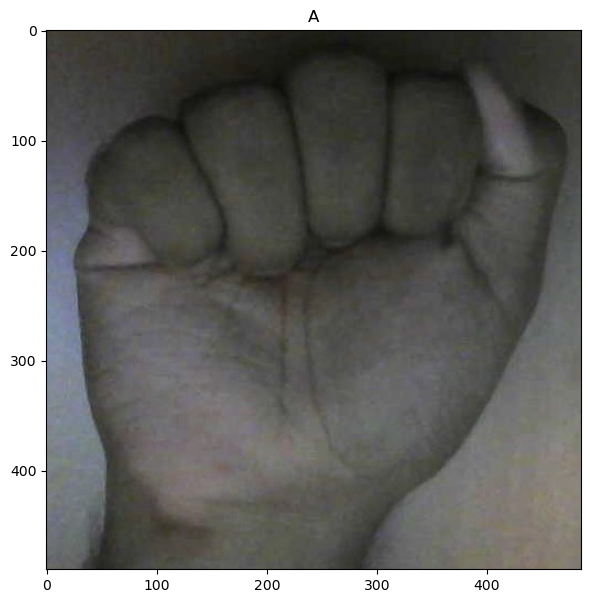

In [29]:
sign_img = cv2.imread(train_data_path+'A/0_A.jpg')
display(sign_img,'A')

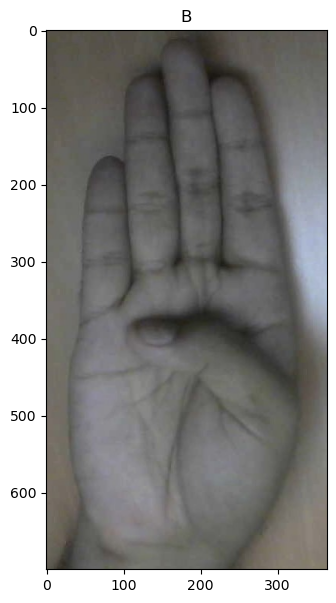

In [30]:
sign_img = cv2.imread(test_data_path+'B/0_B.jpg')
display(sign_img,'B')

In [32]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.2,
                              zoom_range=0.2,
                              rescale=1/255,
                              horizontal_flip=True,
                              fill_mode='nearest',
                              validation_split=0.25)

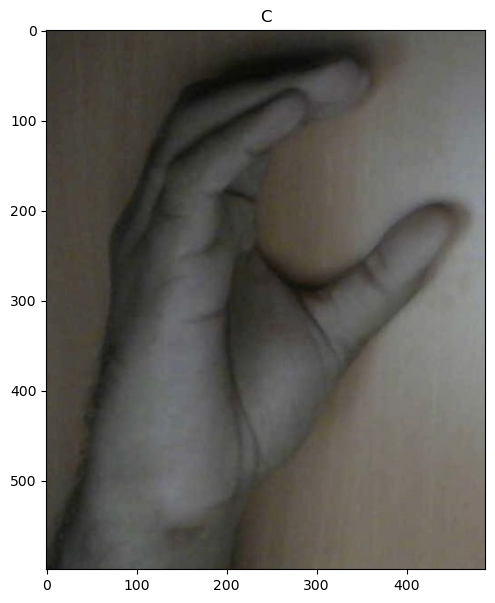

In [33]:
sign_img = cv2.imread(train_data_path+'C/0_C.jpg')
display(sign_img,'C')

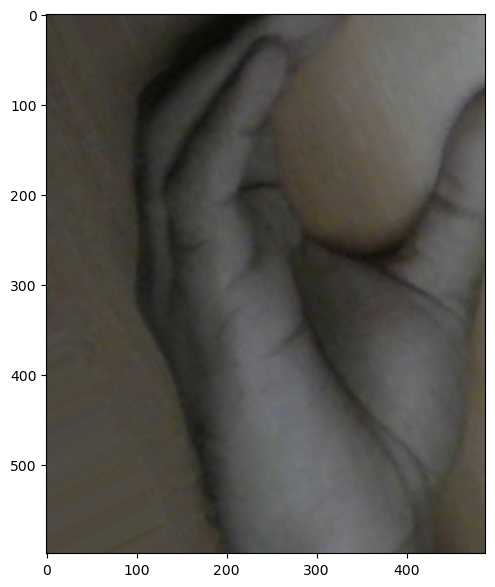

In [34]:
display(image_gen.random_transform(sign_img))

In [35]:
train_data_gen = image_gen.flow_from_directory(train_data_path,
                                           target_size=(250,250),
                                           batch_size=16,
                                           shuffle=True,
                                           class_mode='binary',
                                           subset='training')

Found 11819 images belonging to 9 classes.


In [36]:
validation_data_gen = image_gen.flow_from_directory(train_data_path,
                                           target_size=(250,250),
                                           batch_size=16,
                                           shuffle=True,
                                           class_mode='binary',
                                           subset='validation')

Found 3933 images belonging to 9 classes.


In [37]:
test_data_gen = image_gen.flow_from_directory(test_data_path,
                                           target_size=(250,250),
                                           batch_size=8,
                                           shuffle=True,
                                           class_mode='categorical',
                                           )

Found 2251 images belonging to 9 classes.


In [38]:
train_data_gen.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [39]:
test_data_gen.classes

array([0, 0, 0, ..., 8, 8, 8])

In [40]:
len(train_data_gen.classes)

11819